In [89]:
%matplotlib inline
import pandas
import numpy
import datetime

In [79]:
df = pandas.read_csv("results-20181013-092352.csv", parse_dates=["timestamp"])
df.columns

Index(['timestamp', 'country_code', 'file_version', 'details_distro_name',
       'details_distro_version', 'details_system_name',
       'details_system_release', 'details_cpu'],
      dtype='object')

In [80]:
df.sort_values("timestamp", inplace=True)

In [81]:
df["unique"] = (df["country_code"].map(str) +
                df["details_distro_name"].map(str) +
                df["details_distro_version"].map(str) +
                df["details_system_name"].map(str) +
                df["details_system_release"].map(str) +
                df["details_cpu"].map(str))

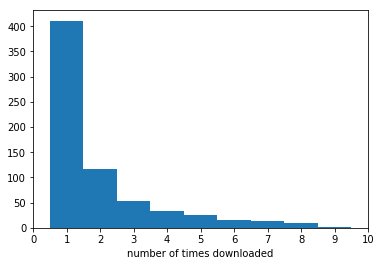

In [82]:
plt = df.groupby("unique").count().hist("timestamp", bins=numpy.arange(0.5, 10.5))[0][0]
plt.set_title("")
plt.set_xlabel("number of times downloaded")
plt.set_xticks(range(11))
plt.grid(False)
plt

In [83]:
df.drop_duplicates("unique", keep="last", inplace=True)

In [111]:
df["since_inception"] = df["timestamp"] - datetime.datetime(2017, 9, 14)

In [151]:
df["weeks_since"] = df["since_inception"].dt.days / 7

In [150]:
df["major_version"] = df["file_version"].apply(lambda x: x[0])

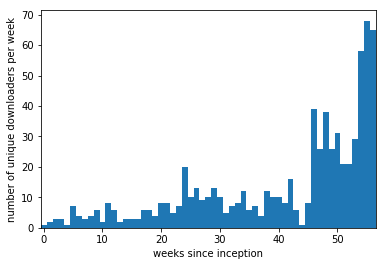

In [152]:
plt = df["weeks_since"].hist(bins=numpy.arange(-0.5, 57.5))
plt.set_xlim(-0.5, 56.5)
plt.grid(False)
plt.set_xlabel("weeks since inception")
plt.set_ylabel("number of unique downloaders per week")
plt

In [185]:
df2 = pandas.DataFrame({"weeks": numpy.round(df["weeks_since"]).astype(int),
                        "v1": df["major_version"] == "1",
                        "v2": df["major_version"] == "2",
                        "v3": df["major_version"] == "3"})

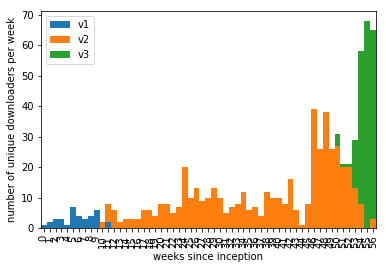

In [187]:
plt = df2.groupby("weeks").sum().plot.bar(stacked=True, width=1)
plt.set_xlim(-0.5, 56.5)
plt.set_xlabel("weeks since inception")
plt.set_ylabel("number of unique downloaders per week")
plt